# Dimension Reduction through Principal Component Analysis on the Wine data set


### Data Source

### Data Dictionary
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline   

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import warnings; warnings.simplefilter('ignore')

from sklearn import model_selection
# To calculate accuracy measures and confusion matrix
from sklearn import metrics

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Ensemble method
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
%matplotlib inline


In [2]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', sep=",", header=None)
df = wine_df.copy(deep=True)


In [3]:
df.shape

(178, 14)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.columns = ['Wine_class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids',
              'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315', 'Proline']

In [6]:
df.head()

,Wine_class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.dtypes

Wine_class                int64
Alcohol                 float64
Malic_acid              float64
Ash                     float64
Alcalinity_of_ash       float64
Magnesium                 int64
Total_phenols           float64
Flavanoids              float64
Nonflavanoid_phenols    float64
Proanthocyanins         float64
Color_intensity         float64
Hue                     float64
OD280/OD315             float64
Proline                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Wine_class              178 non-null int64
Alcohol                 178 non-null float64
Malic_acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280/OD315             178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [9]:
# Check for missing values
print('Number of missing values across columns:\n', df.isnull().sum())


Number of missing values across columns:
 Wine_class              0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64


In [10]:
# Summary statistics of numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wine_class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [11]:
# Target variable 'Wine_class'

df['Wine_class'].unique()

array([1, 2, 3])

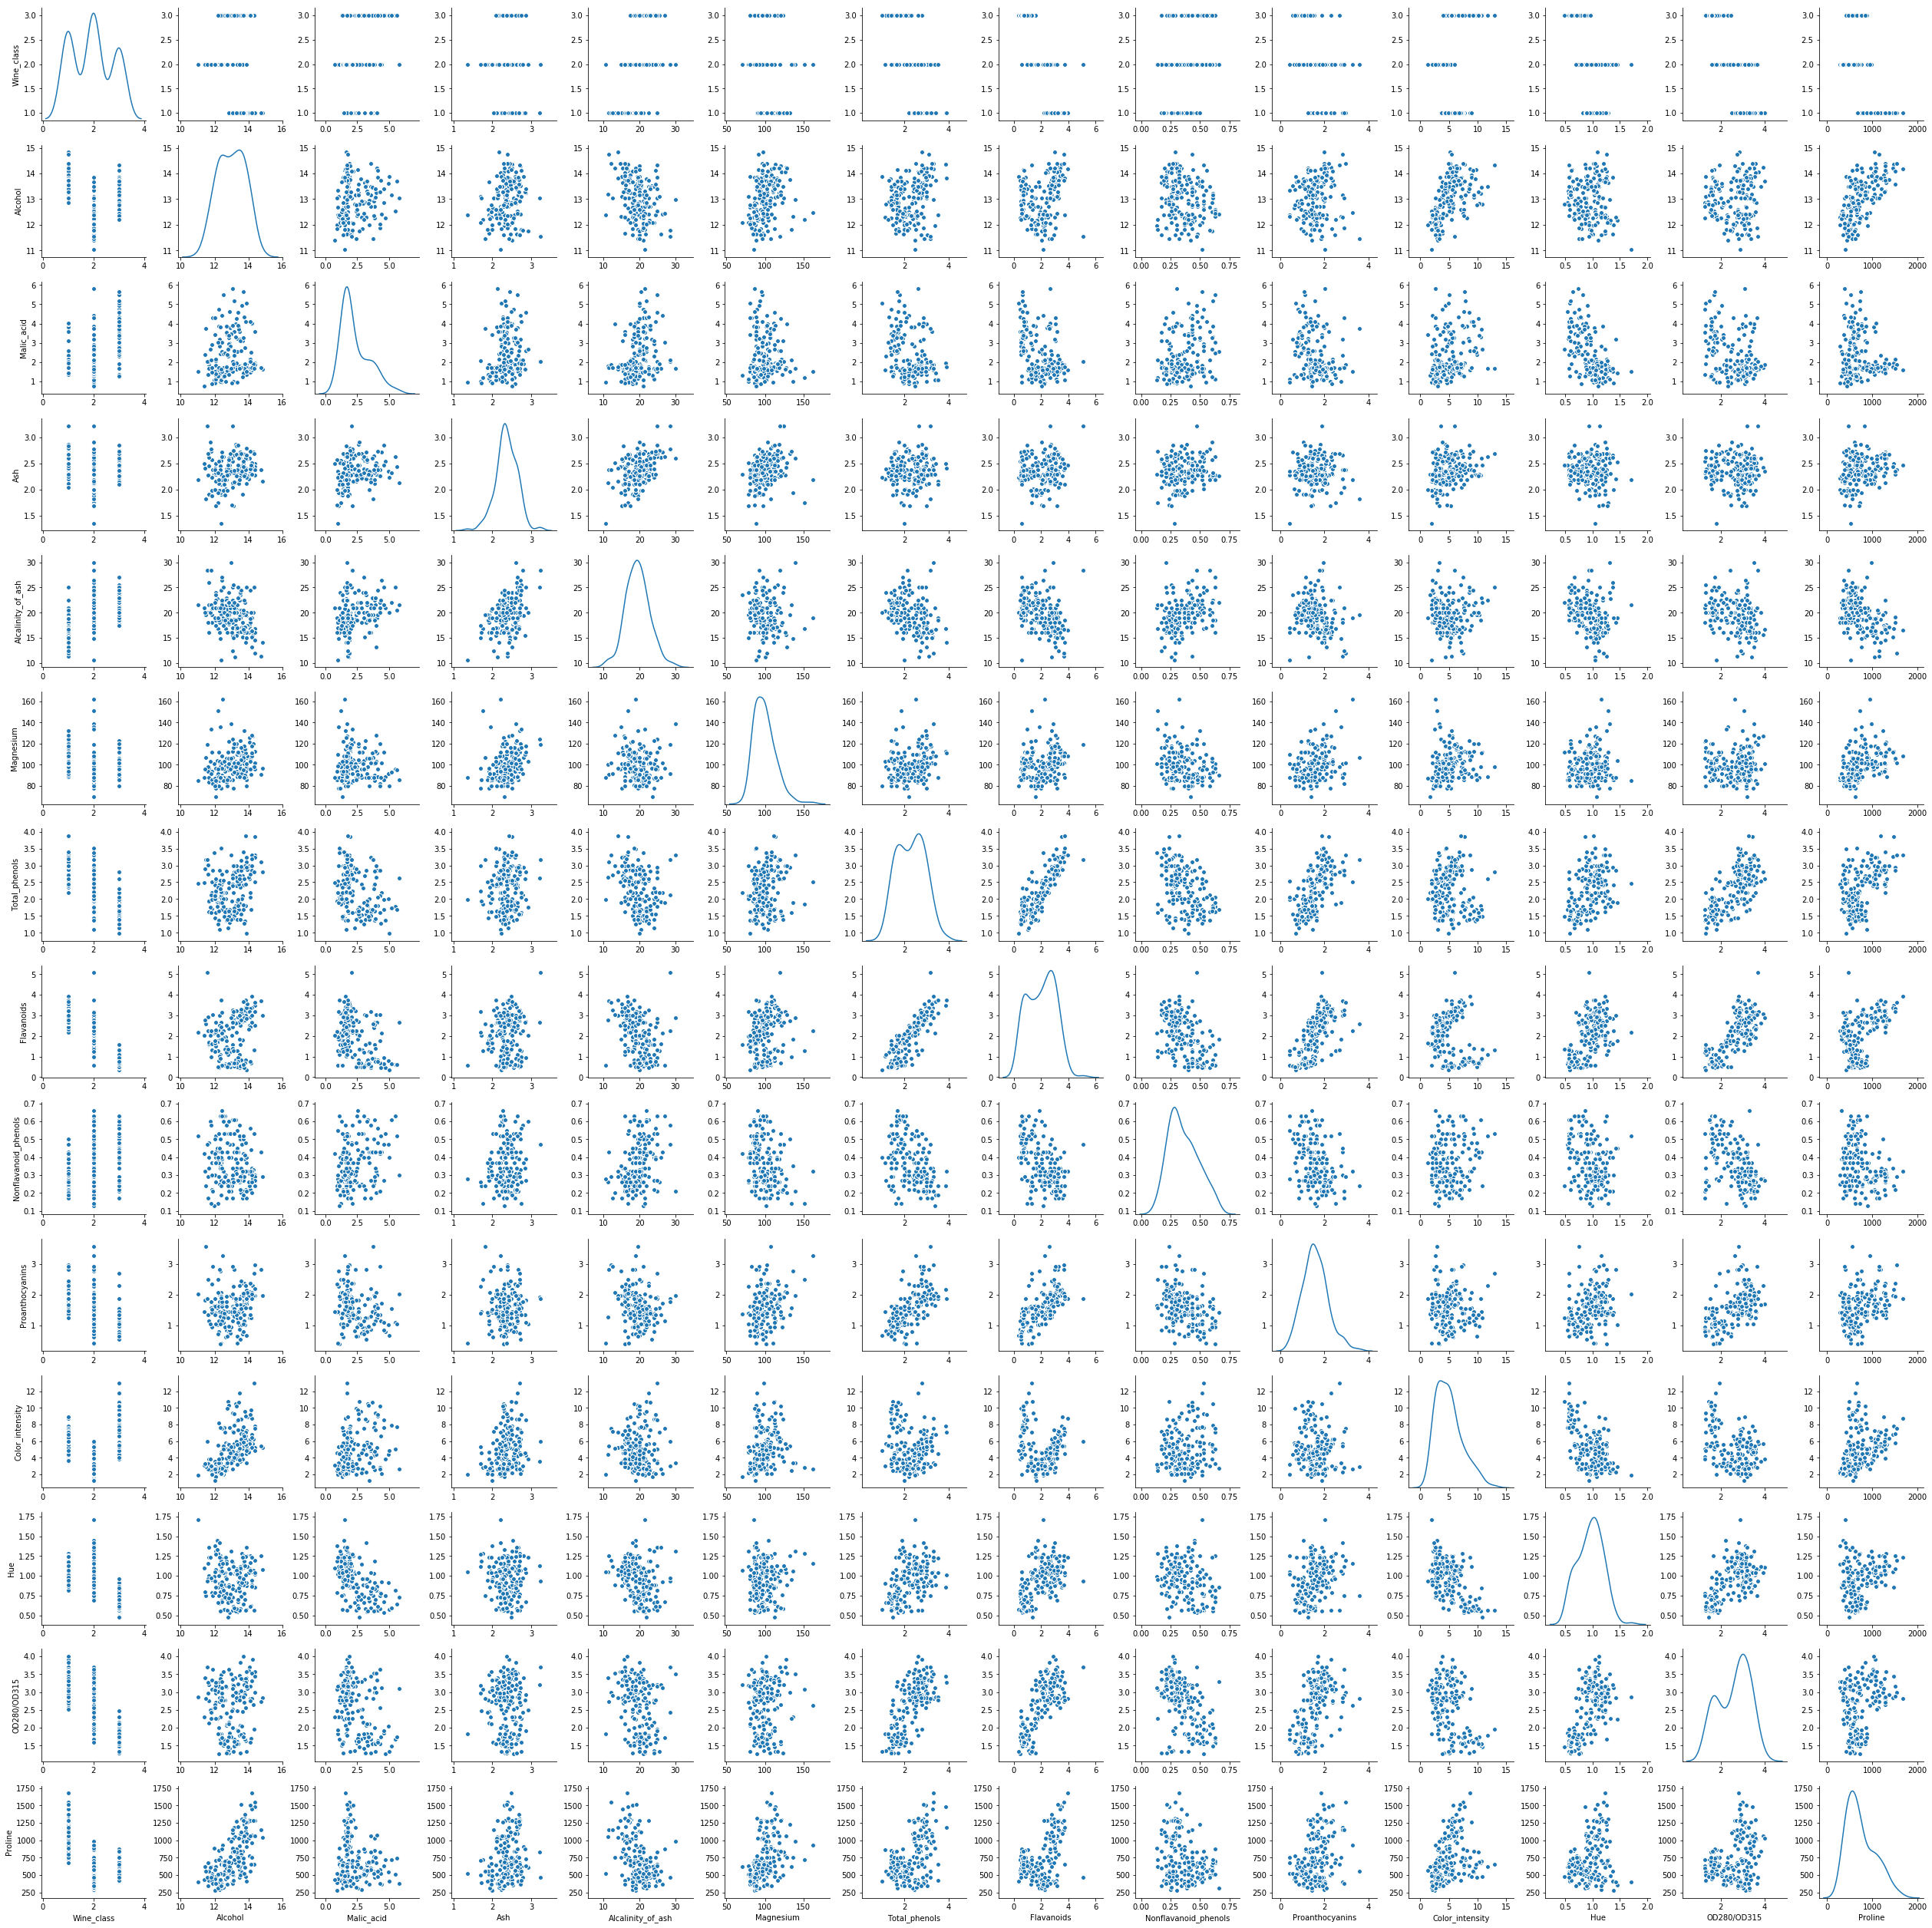

In [12]:
sns.pairplot(df, diag_kind='kde')

### Observation:
There are three modes in the distribution of 'Wine_class' indicating there are 3 classes/clusters of wine.

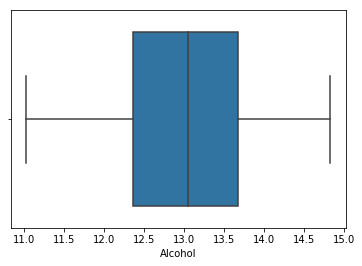

In [13]:
sns.boxplot(x='Alcohol', data=df)

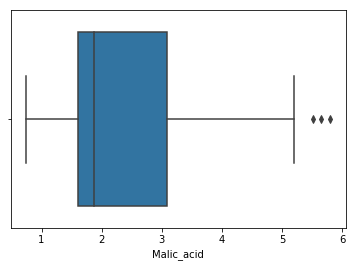

In [14]:
sns.boxplot(x='Malic_acid', data=df)

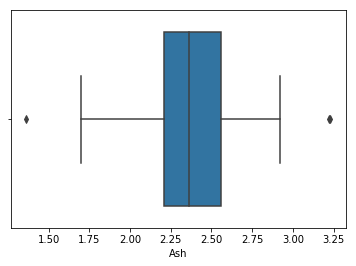

In [15]:
sns.boxplot(x='Ash', data=df)

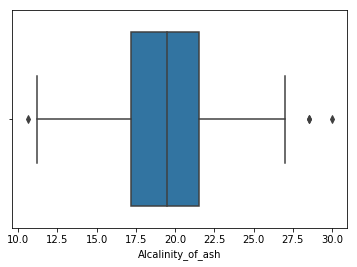

In [16]:
sns.boxplot(x='Alcalinity_of_ash', data=df)

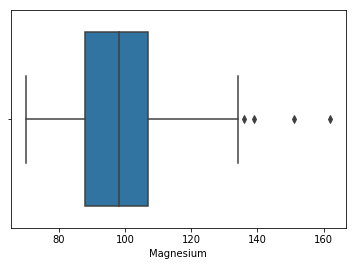

In [17]:
sns.boxplot(x='Magnesium', data=df)

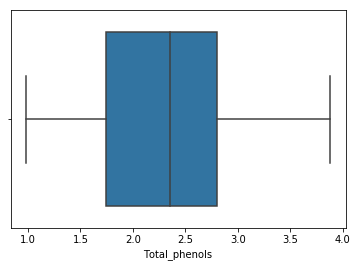

In [18]:
sns.boxplot(x='Total_phenols', data=df)

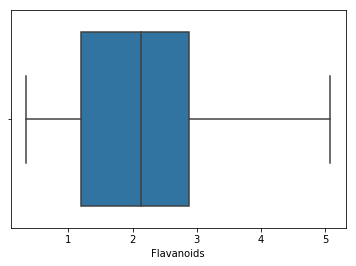

In [19]:
sns.boxplot(x='Flavanoids', data=df)

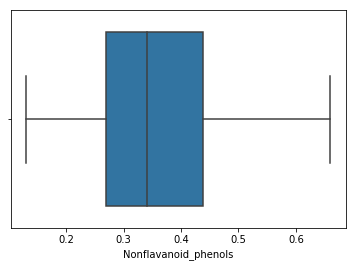

In [20]:
sns.boxplot(x='Nonflavanoid_phenols', data=df)

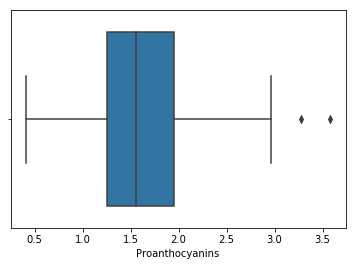

In [21]:
sns.boxplot(x='Proanthocyanins', data=df)

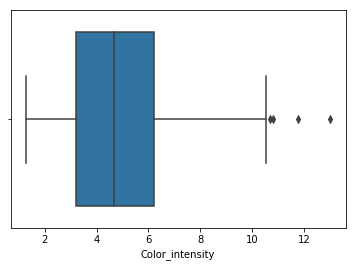

In [22]:
sns.boxplot(x='Color_intensity', data=df)

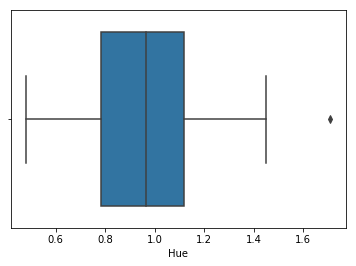

In [23]:
sns.boxplot(x='Hue', data=df)

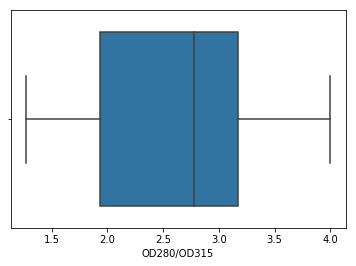

In [24]:
sns.boxplot(x='OD280/OD315', data=df)

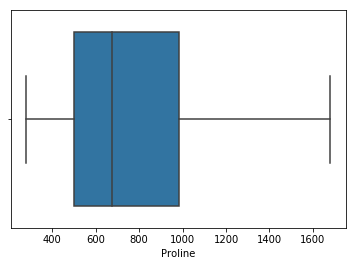

In [25]:
sns.boxplot(x='Proline', data=df)

In [26]:
# PCA directions are highly sensitive to outliers

# Outliers treatment in the below variables

col_names = df[['Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Proanthocyanins', 
                'Color_intensity', 'Hue']].columns.tolist()
col_names


['Malic_acid',
 'Ash',
 'Alcalinity_of_ash',
 'Magnesium',
 'Proanthocyanins',
 'Color_intensity',
 'Hue']

In [27]:
# Outliers treatment

def outliers_treatment(name, data):
    print('\nIndependent variable:', name)
    print('Possible LOWER and UPPER boudaries for "{}" variable below or above which are floored and ceiled to these boundaries'.format(name))
    q75, q25 = np.percentile(data[name], [75, 25])
    iqr = q75 - q25
    min_val = q25 - 1.5*iqr
    max_val = q75 + 1.5*iqr
  
    if min_val<0: # set negative values to zero
        min_val=0        
            
    print('min_val =', min_val)
    print('max_val =', max_val, '\n')       
    
    new_array = np.array(data[name])    
    new_array[new_array > max_val] = max_val
    new_array[new_array < min_val] = min_val
    data[name] = pd.DataFrame(new_array)       
   
    return data


for var in col_names:      
    df = outliers_treatment(var, df)
    
    


Independent variable: Malic_acid
Possible LOWER and UPPER boudaries for "Malic_acid" variable below or above which are floored and ceiled to these boundaries
min_val = 0
max_val = 5.3025 


Independent variable: Ash
Possible LOWER and UPPER boudaries for "Ash" variable below or above which are floored and ceiled to these boundaries
min_val = 1.68875
max_val = 3.07875 


Independent variable: Alcalinity_of_ash
Possible LOWER and UPPER boudaries for "Alcalinity_of_ash" variable below or above which are floored and ceiled to these boundaries
min_val = 10.75
max_val = 27.95 


Independent variable: Magnesium
Possible LOWER and UPPER boudaries for "Magnesium" variable below or above which are floored and ceiled to these boundaries
min_val = 59.5
max_val = 135.5 


Independent variable: Proanthocyanins
Possible LOWER and UPPER boudaries for "Proanthocyanins" variable below or above which are floored and ceiled to these boundaries
min_val = 0.2
max_val = 3.0 


Independent variable: Color_in

In [28]:
X = df.drop(['Wine_class'], axis=1)

y = df[['Wine_class']]
y_labels = ['1', '2', '3']

X.head()


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Applying logarithmic transformation to all independent variables before doing PCA

In [29]:
log_transfrmd_X = np.log(X)
log_transfrmd_X.head()


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,2.655352,0.536493,0.887891,2.747271,4.844187,1.029619,1.118415,-1.272966,0.828552,1.729884,0.039221,1.366092,6.970730
1,2.580217,0.576613,0.760806,2.415914,4.605170,0.974560,1.015231,-1.347074,0.246860,1.477049,0.048790,1.223775,6.956545
2,2.577182,0.858662,0.982078,2.923162,4.615121,1.029619,1.175573,-1.203973,1.033184,1.736951,0.029559,1.153732,7.077498
3,2.665143,0.667829,0.916291,2.821379,4.727388,1.348073,1.249902,-1.427116,0.779325,2.054124,-0.150823,1.238374,7.299797
4,2.583243,0.951658,1.054312,3.044522,4.770685,1.029619,0.989541,-0.941609,0.598837,1.463255,0.039221,1.075002,6.599870


In [30]:
# Replace np.inf, -np.inf (if any) with np.nan

log_transfrmd_X = log_transfrmd_X.replace([np.inf, -np.inf], np.nan)
log_transfrmd_X = log_transfrmd_X.fillna(0)

X = log_transfrmd_X
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,2.655352,0.536493,0.887891,2.747271,4.844187,1.029619,1.118415,-1.272966,0.828552,1.729884,0.039221,1.366092,6.970730
1,2.580217,0.576613,0.760806,2.415914,4.605170,0.974560,1.015231,-1.347074,0.246860,1.477049,0.048790,1.223775,6.956545
2,2.577182,0.858662,0.982078,2.923162,4.615121,1.029619,1.175573,-1.203973,1.033184,1.736951,0.029559,1.153732,7.077498
3,2.665143,0.667829,0.916291,2.821379,4.727388,1.348073,1.249902,-1.427116,0.779325,2.054124,-0.150823,1.238374,7.299797
4,2.583243,0.951658,1.054312,3.044522,4.770685,1.029619,0.989541,-0.941609,0.598837,1.463255,0.039221,1.075002,6.599870


Text(0.5,1,'Correlation among the independent variables\n')

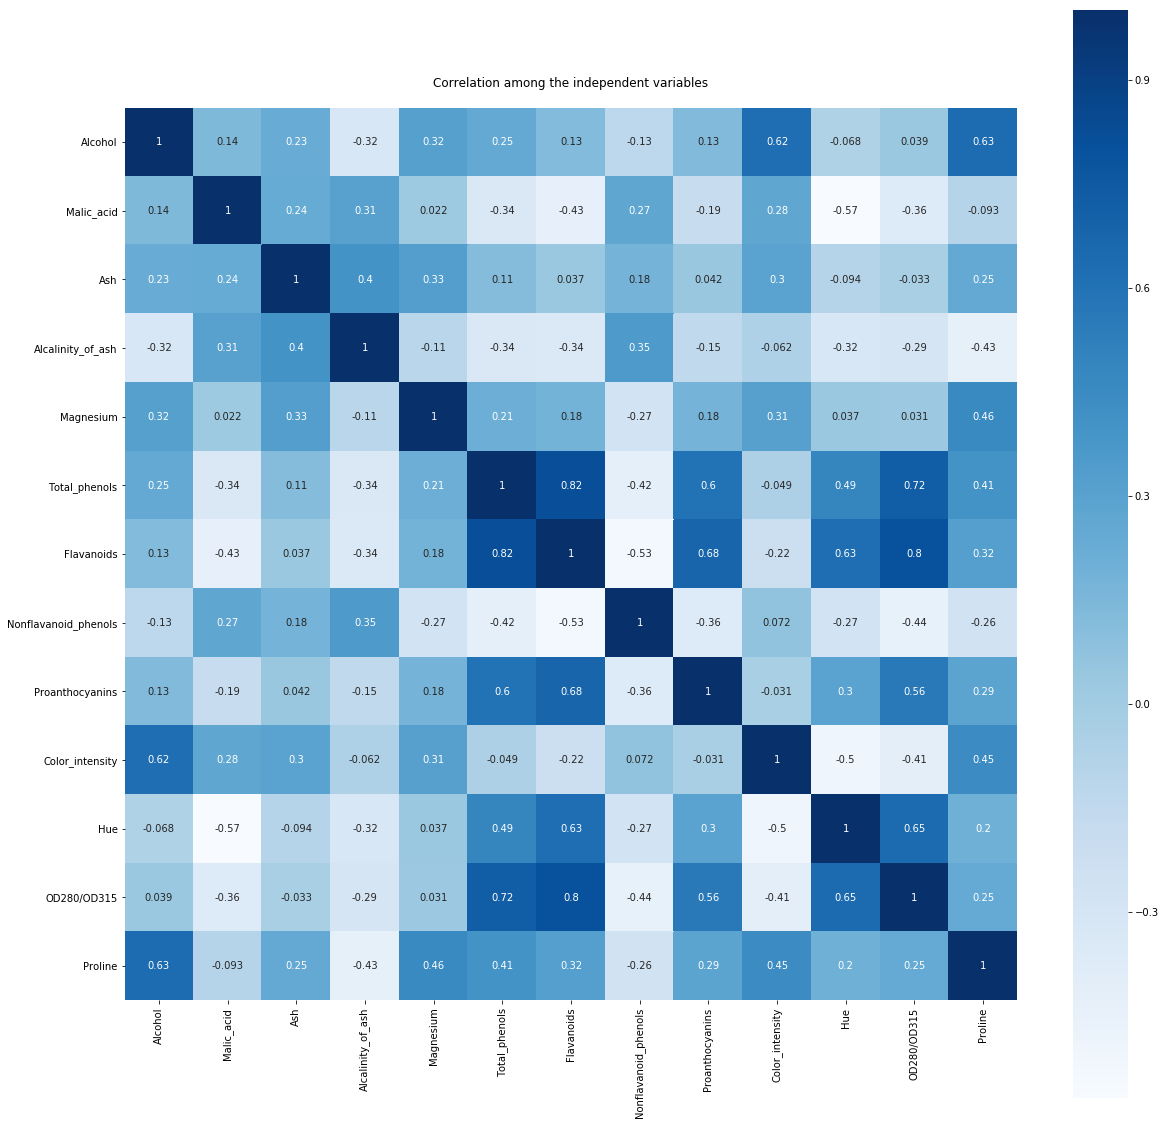

In [31]:
# Correlation among the independent variables
corr = X.corr()
corr
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='Blues')
plt.title('Correlation among the independent variables\n')


# Feature extraction by PCA:

Feature extraction (data compression technique) is an alternative approach to feature selection for dimensionality reduction.  Feature extraction helps us to summarise the information content of a dataset by transforming it into a new feature subspace of lower dimensionality than the original one. Feature extraction is typically used to improve computational efficiency but can also help to reduce the curse of dimensionality.

In [32]:
# As PCA is an unsupervised learning technique dependent variable must be removed

pca_X = X

In [33]:
pca_X.shape

(178, 13)

In [34]:
pca_X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,2.655352,0.536493,0.887891,2.747271,4.844187,1.029619,1.118415,-1.272966,0.828552,1.729884,0.039221,1.366092,6.970730
1,2.580217,0.576613,0.760806,2.415914,4.605170,0.974560,1.015231,-1.347074,0.246860,1.477049,0.048790,1.223775,6.956545
2,2.577182,0.858662,0.982078,2.923162,4.615121,1.029619,1.175573,-1.203973,1.033184,1.736951,0.029559,1.153732,7.077498
3,2.665143,0.667829,0.916291,2.821379,4.727388,1.348073,1.249902,-1.427116,0.779325,2.054124,-0.150823,1.238374,7.299797
4,2.583243,0.951658,1.054312,3.044522,4.770685,1.029619,0.989541,-0.941609,0.598837,1.463255,0.039221,1.075002,6.599870


### Q1. Standardize the d-dimensional dataset.

In [35]:
# Standardise the data of independent variables and then create PCA dimensions on this distribution

pca_X_std = StandardScaler().fit_transform(pca_X)
pca_X_std


array([[ 1.47506513, -0.46447427,  0.287427  , ...,  0.45077095,
         1.49022716,  1.06399053],
       [ 0.27439301, -0.37466076, -0.82774845, ...,  0.48880743,
         1.01698779,  1.02972309],
       [ 0.22589502,  0.2567387 ,  1.11392042, ...,  0.41236696,
         0.78407334,  1.32192211],
       ..., 
       [ 0.35891191,  1.58937118, -0.34899301, ..., -1.80234795,
        -1.57369282,  0.47622694],
       [ 0.23803332,  0.46492218,  0.06804042, ..., -1.73554332,
        -1.44819617,  0.49064975],
       [ 1.36237021,  1.49318646,  1.34101275, ..., -1.66984294,
        -1.48950436, -0.48887858]])

### Q2. Construct the covariance matrix.

In [36]:
# Transpose the 'pca_X_std' and then calculate covariance matrix

cov_matrix = np.cov(pca_X_std.T)
print(cov_matrix.shape)

print('\nCovariance Matrix for independent variables \n\n%s', cov_matrix)


(13, 13)

Covariance Matrix for independent variables 

%s [[ 1.00564972  0.13801118  0.23341753 -0.32015456  0.32214948  0.24878936
   0.12900079 -0.13007008  0.13307258  0.62729111 -0.0687179   0.03877147
   0.63705406]
 [ 0.13801118  1.00564972  0.23938532  0.30761517  0.02163484 -0.33706734
  -0.43658298  0.27384723 -0.18966268  0.27849999 -0.57047526 -0.36264924
  -0.09395853]
 [ 0.23341753  0.23938532  1.00564972  0.40588139  0.3291935   0.11344299
   0.03673964  0.17944761  0.04252254  0.29868355 -0.09447909 -0.03351636
   0.25440182]
 [-0.32015456  0.30761517  0.40588139  1.00564972 -0.11467852 -0.34152974
  -0.3431288   0.35400902 -0.14658604 -0.06204305 -0.31899493 -0.29537656
  -0.43186792]
 [ 0.32214948  0.02163484  0.3291935  -0.11467852  1.00564972  0.21443225
   0.18328453 -0.27337018  0.17619582  0.31130673  0.03747332  0.03107668
   0.45957306]
 [ 0.24878936 -0.33706734  0.11344299 -0.34152974  0.21443225  1.00564972
   0.8210127  -0.41739571  0.60339975 -0.04901443  0

### Q3. Decompose the covariance matrix into its eigenvectors and eigenvalues.

In [37]:
# Calculate eigen-values and eigen-vectors

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)


In [38]:
# Eigen-value is the magnitude(measure of signal) of each vector(independent variable)
# Here magnitude(measure of signal) refers to the variance captured by each dimension(independent variable) in mathematical space

print(eig_vals.shape)
eig_vals


(13,)


array([ 4.62188784,  2.78803053,  1.45167759,  0.83991077,  0.89714045,
        0.59299876,  0.48428934,  0.36446371,  0.31088881,  0.12131399,
        0.15705176,  0.20477442,  0.23901837])

In [39]:
# eigenvectors of the covariance matrix represent the principal components(the directions of maximum variance)
# Eigen-vector consists of cosine values of each independent variable on every other dimension

print(eig_vecs.shape)
eig_vecs


(13, 13)


array([[ -1.09996770e-01,  -4.75267448e-01,  -1.74731167e-01,
          3.04496431e-01,   8.52016571e-03,   1.05023198e-01,
          2.38773923e-01,  -1.47801002e-01,   6.53568297e-01,
         -3.56023184e-02,   2.23726938e-01,  -2.43355020e-01,
         -1.05439400e-01],
       [  2.48986144e-01,  -2.18393849e-01,   1.92650863e-01,
          9.98025785e-02,  -4.68202049e-01,   7.05096335e-01,
         -1.50018505e-01,  -1.24989916e-02,  -4.54796803e-02,
         -3.07890493e-02,  -3.52019839e-02,   3.14153430e-01,
         -3.53753717e-02],
       [  2.25104599e-02,  -3.01674636e-01,   6.02175938e-01,
          2.90248521e-02,   3.21189641e-01,   4.12127102e-02,
          2.72830664e-01,   1.00431069e-01,  -3.06577920e-01,
          1.08101325e-01,   5.63615929e-02,  -1.65792906e-01,
         -4.68298317e-01],
       [  2.44222939e-01,   6.76554968e-02,   6.01285257e-01,
         -1.06047154e-01,  -3.50299673e-02,  -2.20202781e-01,
          2.36246260e-01,  -3.05530938e-01,   3.085

In [40]:
print("Eigen Values:")
pd.DataFrame(eig_vals).T


Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.621888,2.788031,1.451678,0.839911,0.89714,0.592999,0.484289,0.364464,0.310889,0.121314,0.157052,0.204774,0.239018


In [41]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('\nCumulative Variance Explained\n\n', cum_var_exp)



Cumulative Variance Explained

 [ 35.35324752  56.67915088  67.78316701  74.64547725  81.07003238
  85.60593474  89.31030867  92.09812529  94.47614251  96.30441613
  97.87075459  99.07205804 100.        ]


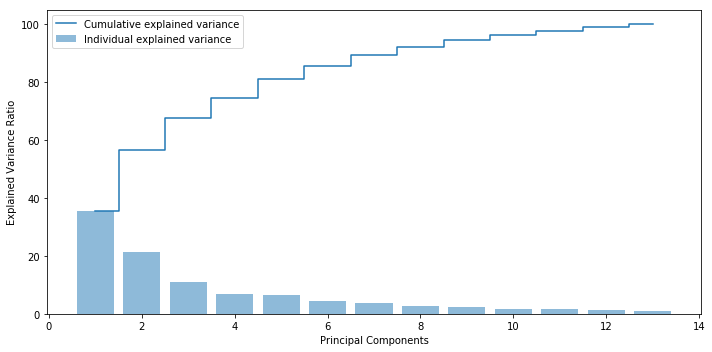

In [42]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


### Observation:
Here the first 5 principal components capture 81.07% of the explained cumulative variance among all the independent variables. Choosing 5 PCs will help to maximize the signal of the data, while preserving the low-dimensionality.

After 5 PCs the the difference between consecutive cumulative variances are getting converged, so k=5 would be preferable.

### Q4. Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace( k≤d ).

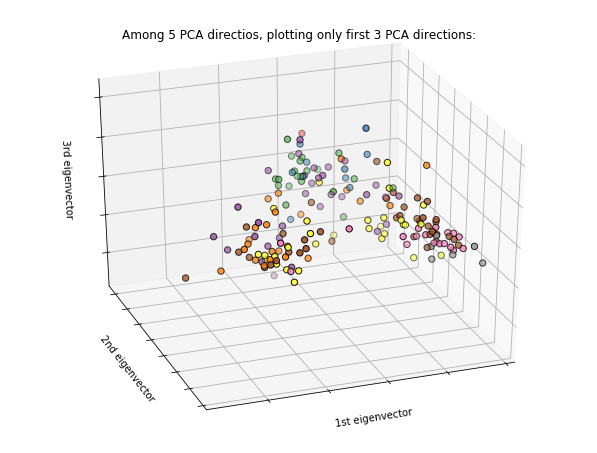

In [43]:

# Here k = 5 from the above observation

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

# Build PCA on the entire dataset(all IVs)
X_reduced = PCA(n_components=5).fit_transform(pca_X_std)

# Plotting only first 3 PCA dimensions  
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=X.iloc[:,0].values,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("Among 5 PCA directios, plotting only first 3 PCA directions:")

ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Q5. Construct a projection matrix W from the "top" k eigenvectors.

In [44]:
#Sort the eigen-pairs by descending order of the eigen-values

eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(4.6218878402473038,
  array([-0.10999677,  0.24898614,  0.02251046,  0.24422294, -0.12528525,
         -0.39502397, -0.42711024,  0.28959373, -0.31715416,  0.08823578,
         -0.33257841, -0.39288774, -0.23320706])),
 (2.7880305295323011,
  array([-0.47526745, -0.21839385, -0.30167464,  0.0676555 , -0.34801392,
         -0.06205453,  0.04200053,  0.02075027, -0.04481459, -0.51466554,
          0.22114614,  0.13943634, -0.41041928])),
 (1.4516775879113715,
  array([-0.17473117,  0.19265086,  0.60217594,  0.60128526,  0.10291184,
          0.15910235,  0.16074767,  0.16443152,  0.24296806, -0.12769113,
          0.02319107,  0.16460883, -0.12822056])),
 (0.89714044716993935,
  array([ 0.00852017, -0.46820205,  0.32118964, -0.03502997,  0.20445005,
         -0.0901294 , -0.10163631,  0.36169756, -0.45174425, -0.08963614,
          0.46269069, -0.08272055,  0.22850229])),
 (0.83991076637250561,
  array([ 0.30449643,  0.09980258,  0.02902485, -0.10604715, -0.69136853,
          0.179695

In [45]:
#Collect five eigen-vectors that correspond to the five largest values to capture about 81.07% of the variance 

W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis],
               eigen_pairs[4][1][:, np.newaxis]))

# W is 13*5 dimensional projection matrix from the top five eigen-vectors

print('13*5 dimensional projection matrix W:\n\n', W)


13*5 dimensional projection matrix W:

 [[-0.10999677 -0.47526745 -0.17473117  0.00852017  0.30449643]
 [ 0.24898614 -0.21839385  0.19265086 -0.46820205  0.09980258]
 [ 0.02251046 -0.30167464  0.60217594  0.32118964  0.02902485]
 [ 0.24422294  0.0676555   0.60128526 -0.03502997 -0.10604715]
 [-0.12528525 -0.34801392  0.10291184  0.20445005 -0.69136853]
 [-0.39502397 -0.06205453  0.15910235 -0.0901294   0.17969545]
 [-0.42711024  0.04200053  0.16074767 -0.10163631  0.04807754]
 [ 0.28959373  0.02075027  0.16443152  0.36169756  0.56164464]
 [-0.31715416 -0.04481459  0.24296806 -0.45174425  0.08466748]
 [ 0.08823578 -0.51466554 -0.12769113 -0.08963614  0.10631687]
 [-0.33257841  0.22114614  0.02319107  0.46269069  0.06446862]
 [-0.39288774  0.13943634  0.16460883 -0.08272055  0.16015225]
 [-0.23320706 -0.41041928 -0.12822056  0.22850229  0.09444081]]


### Q6. Transform​ ​the d-dimensional​ ​input​ ​dataset X using​ ​the​ ​projection​ ​matrix W to​ ​obtain​ ​the new k-dimensional​ ​feature​ ​subspace

In [46]:
"""Using the projection matrix W transform the entire 178*13 dimensional dataset(pca_X_std) onto 
the five principal components by calculating the matrix dot product"""

X_pca_transformed = pca_X_std.dot(W)
print(X_pca_transformed.shape)
X_pca_transformed


(178, 5)


array([[ -2.98556654e+00,  -1.88482488e+00,  -1.72335817e-01,
          1.70249310e-01,  -4.03189703e-01],
       [ -2.40114940e+00,  -1.81286930e-01,  -2.40910552e+00,
          1.85736187e-01,   2.50230089e-01],
       [ -2.10150148e+00,  -1.25688675e+00,   1.13423556e+00,
         -3.84027397e-01,   4.83806629e-01],
       [ -3.02715324e+00,  -2.74143605e+00,  -3.10031371e-04,
         -5.02027899e-01,   2.40510402e-01],
       [ -1.02096073e+00,  -1.09817093e+00,   2.06686596e+00,
          5.74258008e-01,  -2.47676146e-01],
       [ -2.61787299e+00,  -2.22681832e+00,  -5.10216574e-01,
          5.19998249e-01,   6.00573845e-01],
       [ -2.29210413e+00,  -1.45306849e+00,  -8.33715173e-01,
          9.34364548e-02,   1.15745498e+00],
       [ -1.82964577e+00,  -1.93499927e+00,   2.16749660e-01,
          1.08252968e+00,  -2.66763279e-01],
       [ -2.47107328e+00,  -1.19125544e+00,  -1.71406093e+00,
         -1.26570918e-01,   1.08763817e+00],
       [ -2.70332321e+00,  -1.0229423

### Split 'X_pca_transformed' into train and test sets

In [47]:
# Splitting 'X_pca_transformed' into train_set and test_set (70-30 split)  

X_train, X_test, y_train, y_test = train_test_split(X_pca_transformed, y, test_size=0.3 , random_state=7)


### Classifiers

In [48]:
def classifiers(X_train, X_test, y_train, y_test):
    
    # Logistic Regression
      
    logit_model = LogisticRegression()
    logit_model.fit(X_train, y_train)
    accuracy = logit_model.score(X_test, y_test)
    y_pred = logit_model.predict(X_test)
    print('\nLogistic Regression model accuracy score = ', round(accuracy, 4))

    # Gaussian Naive Bayes Classifier

    gnb_clf = GaussianNB()
    gnb_clf.fit(X_train, y_train)
    accuracy = gnb_clf.score(X_test, y_test)
    y_pred = gnb_clf.predict(X_test)
    print('\nGaussian Navie Bayes Model accuracy = ', round(accuracy, 4))
    
    # K-Nearest Neighbors Classifier

    knn_clf = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
    knn_clf.fit(X_train, y_train)
    accuracy = knn_clf.score(X_test, y_test)
    y_pred = knn_clf.predict(X_test)
    print('\nKNN Model accuracy = ', round(accuracy, 4))
    
    knn_clf = KNeighborsClassifier(n_jobs=-1, metric = 'euclidean')
    k_neighbors = np.arange(5, 50, 5)
    scores = []

    for n in k_neighbors:
        knn_clf.set_params(n_neighbors=n)
        knn_clf.fit(X_train, y_train)
        scores.append(knn_clf.score(X_test, y_test))   
    
    i=0
    for score in scores:
        if score==max(scores):
            k = k_neighbors.tolist()[i]    
            print('n_neighbors = ', k)
            break
        i=i+1       
        
    knn_clf = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn_clf.fit(X_train, y_train)
    accuracy = knn_clf.score(X_test, y_test)
    y_pred = knn_clf.predict(X_test)
    print('KNN Model accuracy  with {0} as n_neighbors = {1}'.format(k, round(accuracy, 4)))
    
    # Support Vector Machine for Classification
    
    svm_clf = SVC()
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test, y_test)
    y_pred = svm_clf.predict(X_test)
    print('\nSVM (classifier) Model accuracy  = ', round(accuracy, 4))
    
    # Decision Tree Classifier
    
    dt_clf = DecisionTreeClassifier(criterion = 'entropy')
    dt_clf.fit(X_train, y_train)
    accuracy = dt_clf.score(X_test , y_test)
    y_pred = dt_clf.predict(X_test)
    print('\nDecision Tree Model accuracy = ', round(accuracy, 4))
    
    dt_clf = DecisionTreeClassifier(criterion = 'entropy')
    max_depth_est = np.arange(5, 50, 5)
    scores = []

    for n in max_depth_est:
        dt_clf.set_params(max_depth=n)
        dt_clf.fit(X_train, y_train)
        scores.append(dt_clf.score(X_test, y_test))   
    
    i=0
    for score in scores:
        if score==max(scores):
            d = max_depth_est.tolist()[i]
            print('max_depth = ', d)
            i = i+1
            break      
        
    dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
    dt_clf.fit(X_train, y_train)
    accuracy = dt_clf.score(X_test , y_test)
    y_pred = dt_clf.predict(X_test)
    print('Decision Tree Model accuracy with {0} as max_depth = {1}'.format(d, round(accuracy, 4)))
    
    #Boosting Algorithm: AdaBoost Classifier

    dt = DecisionTreeClassifier() 
    AdaBoost_clf = AdaBoostClassifier(base_estimator=dt)# decision tree is used as a base estimator
    AdaBoost_clf.fit(X_train,y_train)
    accuracy = AdaBoost_clf.score(X_test, y_test)
    y_pred = AdaBoost_clf.predict(X_test)
    print('\nAdaBoost Model accuracy = ', round(accuracy, 4))
    
    #Cross-validation of AdaBoost model
    
    X = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_test)])
    y = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)])
    
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    AdaBoost_clf = AdaBoostClassifier(random_state=7)
    accuracy = model_selection.cross_val_score(AdaBoost_clf, X, y, cv=kfold)
    print('KFold cross-validation: AdaBoost model accuracy = ', round(accuracy.mean(), 4))
    
    #Bagging Algorithm: Random Forest Classifier

    rf_clf = RandomForestClassifier(criterion = 'gini')
    rf_clf = rf_clf.fit(X_train, y_train)
    accuracy = rf_clf.score(X_test, y_test)
    y_pred = rf_clf.predict(X_test)
    print('\nRandom Forest Model accuracy = ', round(accuracy, 4))
    
    #Calculate n_estmators
    rf_clf = RandomForestClassifier(criterion = 'gini')
    estimators = np.arange(5, 50, 5)
    scores = []

    for n in estimators:
        rf_clf.set_params(n_estimators=n)
        rf_clf.fit(X_train, y_train)
        scores.append(rf_clf.score(X_test, y_test))   
    
    i=0
    for score in scores:
        if score==max(scores):
            n = estimators.tolist()[i]
            print('n_estmators = ', n)
            i = i+1
            break
        
    rf_clf = RandomForestClassifier(criterion = 'gini', n_estimators=n)
    rf_clf = rf_clf.fit(X_train, y_train)
    accuracy = rf_clf.score(X_test, y_test)
    y_pred = rf_clf.predict(X_test)
    print('Random Forest Model accuracy with {0} as n_estimators = {1}'.format(n, round(accuracy, 4)))   
        
    

In [49]:
print('\n**********Model accuracies for different classifiers:**********')

classifiers(X_train, X_test, y_train, y_test)



**********Model accuracies for different classifiers:**********

Logistic Regression model accuracy score =  1.0

Gaussian Navie Bayes Model accuracy =  1.0

KNN Model accuracy =  0.9259
n_neighbors =  15
KNN Model accuracy  with 15 as n_neighbors = 0.963

SVM (classifier) Model accuracy  =  0.963

Decision Tree Model accuracy =  0.963
max_depth =  5
Decision Tree Model accuracy with 5 as max_depth = 0.963

AdaBoost Model accuracy =  0.9815
KFold cross-validation: AdaBoost model accuracy =  0.9275

Random Forest Model accuracy =  1.0
n_estmators =  5
Random Forest Model accuracy with 5 as n_estimators = 0.9815


### Key points:

PCA is a commonly used unsupervised data compression technique. PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new sub-space with equal or fewer dimensions than the original one.

**Popular applications of PCA:**

    Dimensionality reduction
    
    EDA and de-noising the signals in stock market trading


**Limitations of PCA:**

    It can get tricked by high-variance noise

    It fails to discover nonlinear structure

    The orthogonality constraints on the principal components mean that the principal components after the first few
    can be difficult to interpret